In [1]:
import gpxpy
import gpxpy.gpx
import matplotlib.pyplot as plt
import haversine
import vincenty
import pandas as pd

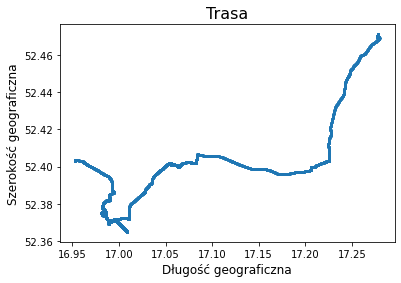

In [2]:
gpx_file = open('Afternoon_Ride.gpx', 'r')

gpx = gpxpy.parse(gpx_file)

long = []
lat = []

for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            long.append((point.longitude))
            lat.append((point.latitude))
plt.scatter(long, lat, s=4)
plt.xlabel('Długość geograficzna', fontsize = 12)
plt.ylabel('Szerokość geograficzna', fontsize = 12)
plt.title('Trasa', fontsize = 16)            
plt.show()

In [3]:
data = gpx.tracks[0].segments[0].points

df = pd.DataFrame(columns=['time'])
for point in data:
    df = df.append({'time' : point.time}, ignore_index = True)

distance = []
time = []
for i in range(len(data)):
    if i == 0:
        pass
    else:
        distance_i = haversine.haversine((lat[i-1], long[i-1]), (lat[i], long[i]))
        distance.append(distance_i)
        time_roznica = (data[i].time - data[i-1].time).total_seconds()
        time.append(time_roznica)
print('Długość trasy: ', round(sum(distance), 2), 'km, Czas: ', round(sum(time)/60, 2), 'min, Średnia prędkość: ', round(sum(distance)/(sum(time)/3600), 2), 'km/h')

Długość trasy:  38.69 km, Czas:  64.02 min, Średnia prędkość:  36.26 km/h
